In [35]:
#Importing Libs
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.style as stl
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import math
stl.use('default')

# Questão 1

Utilize redes neurais perceptron de múltiplas camadas para aproximar as funções abaixo. 
Apresente um gráfico com a curva da função analítica e a curva da função aproximada
pela rede neural. Apresente também a curva do erro médio de treinamento com relação ao
número de épocas e a curva do erro médio com o conjunto de validação. Procure definir
para cada função a arquitetura da rede neural perceptron, isto é, o número de entradas, o
número de neurônios em cada camada e o número de neurônios camada de saída.

### a) f (x1,x2) = (1 -x1)² + 100 (x2 - x1²)  com  -10 ≤ x1 ≤ 10 e -10 ≤ x2 ≤ 10
 

In [3]:
def letraA(x1,x2):
  return math.pow((1-x1) , 2) + 100 * (x2 - math.pow(x1,2))

In [18]:
x = np.arange(-10,10,0.05)
xy = [(j,k) for j in x for k in x]
out = [letraA(p[0],p[1]) for p in xy]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(xy, out)

In [16]:
#mse array
arr = np.empty(5)

In [17]:
# set up network with parameters
mlp = MLPRegressor( hidden_layer_sizes=[20], max_iter=1000, tol=0)

# train network
mlp.fit(x_train,y_train)

# test
predictions = mlp.predict(x_test)

mse = mean_squared_error(y_test, predictions)
mse

c:\Users\efrai\Documents\Academico\PDS\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


3599313.2678519404

## b) x1² +x2² + 2x1x2 * cos(pi*x1x2) + x1 + x2 - 1 com |x1| <= 1 e |x2| <= 1


In [25]:
def letraB(x,y):
  return (x**2 + y**2 + 2*x*y*math.cos(math.pi*x*y)+x+y-1)

In [28]:
x = np.arange(-1,1,0.05)
xy = [(j,k) for j in x for k in x]
out = [letraB(p[0],p[1]) for p in xy]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(xy, out)

In [31]:
#mse array
arr = np.empty(5)

In [43]:
# set up network with parameters
mlp = MLPRegressor( hidden_layer_sizes=[5], max_iter=1000, tol=0)

# train network
mlp.fit(x_train,y_train)

# test
predictions = mlp.predict(x_test)

mse = mean_squared_error(y_test, predictions)
mse

c:\Users\efrai\Documents\Academico\PDS\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.14128356184780697

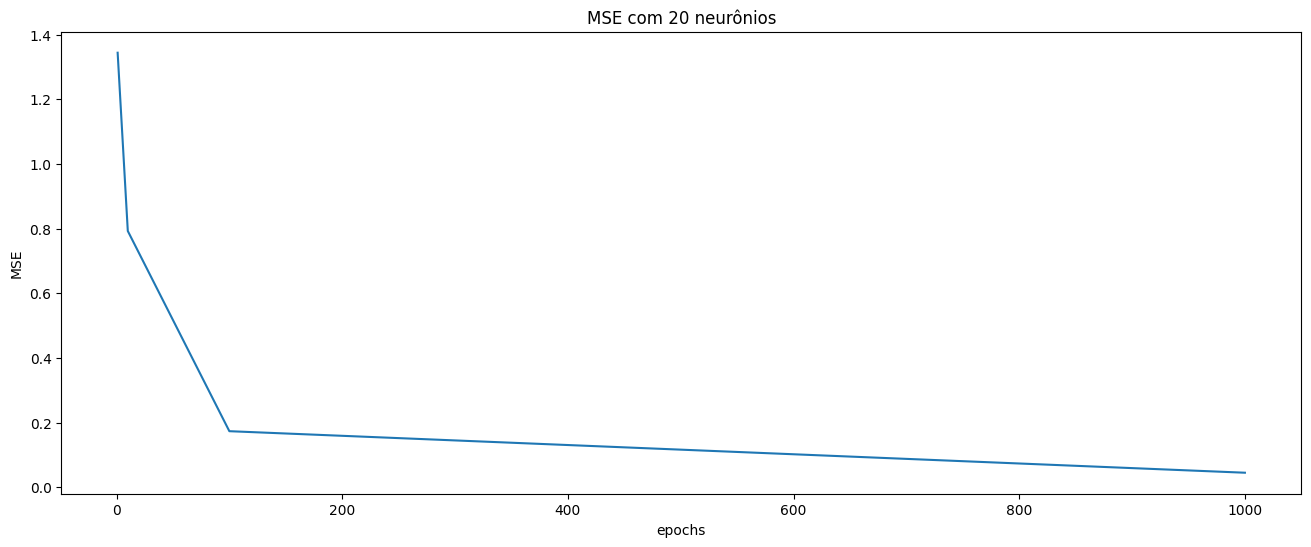

In [36]:
# 5 neuronios 1-10-100-1000 4.038911905915415, 1.2585460364771435, 0.5077961249121123, 0.16822347972521962
# 20 neuronios 1 - 10 - 100 - 1000 1.3438102594204995, 0.7924179590331073, 0.1731673482314536, 0.044706593435991114
y = np.array([1.3438102594204995, 0.7924179590331073, 0.1731673482314536, 0.044706593435991114])
x = np.array([1, 10, 100, 1000])
plt.rcParams["figure.figsize"] = (10,6)
plt.figure(figsize=(16,6))
plt.plot(x,y) 

# Add Title

plt.title("MSE com 20 neurônios") 

# Add Axes Labels

plt.xlabel("epochs") 
plt.ylabel("MSE") 

# Display

plt.show()

C:\Users\efrai\AppData\Local\Temp\ipykernel_17220\2632060632.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


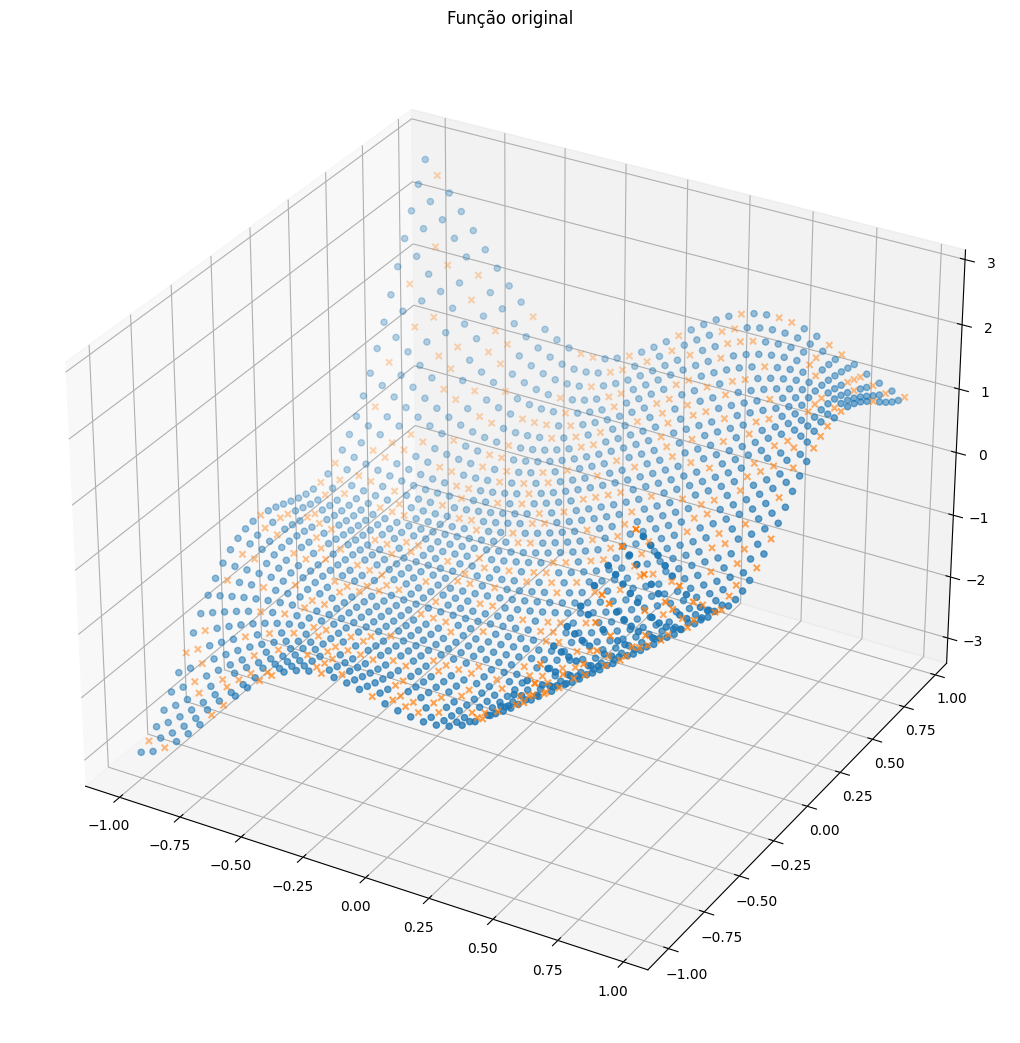

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (16,13)
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.title("Função original") 
# plot train data points
x1_vals = np.array([p[0] for p in x_train])
x2_vals = np.array([p[1] for p in x_train])

ax.scatter(x1_vals, x2_vals, y_train)

# plot test data points
x1_vals = np.array([p[0] for p in x_test])
x2_vals = np.array([p[1] for p in x_test])
ax.scatter(x1_vals, x2_vals, y_test, marker='x')
#ax.scatter(x1_vals, x2_vals, predictions, c='red')

plt.show()